# Packages

In [1]:
import sys
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split
import random
import cebra
from cebra import CEBRA
import cebra.grid_search
import time
import joblib as jl
from matplotlib.collections import LineCollection
import cebra.integrations.plotly
import os
import torch
%matplotlib inline

In [2]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.color'] = 'k'
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
conf_dir = "/scratch/09117/xz6783/Xu/PL_miniscope/PL/Analysis/Cat_Odor_Conflict/Conflict/extracted_data/Calcium"
source_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/data"
output_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/training/output"
model_dir = "/scratch/09117/xz6783/Xu/CEBRA/Cebra_behavior/Cat_odor_conflict/visualization/models"
animal_id = '2Z4'

# 1. Dataset

In [4]:
Dt = pd.read_csv(os.path.join(source_dir, f'{animal_id}_withcue.csv'), index_col= 0)
# Split
Y = Dt.iloc[:, 0:9]
X = Dt.iloc[:, 9:]
# View data
Dt

,Timepoint,Time,Speed,Freezing,In Food Area,In Hidden Area,Bar Press active,Miniscope record active,Tone active,0,...,69,70,71,72,73,74,75,76,77,78
0,1,0.485000,0.022373,0.0,0.0,1.000000,0.0,0.217498,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,1.522200,0.015869,0.0,0.0,1.000000,0.0,0.338652,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,2.534600,0.087218,0.0,0.0,0.448276,0.0,0.255519,0.0,8.039923,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,3.547000,0.042712,0.0,0.0,0.000000,0.0,0.322580,0.0,14.727130,...,0.000000,0.000000,0.000000,0.0,11.542175,0.000000,0.000000,0.000000,0.000000,19.568439
4,5,4.559400,0.012157,0.0,0.0,0.000000,0.0,0.296247,0.0,12.408046,...,0.000000,0.000000,0.000000,0.0,12.662953,0.000000,0.000000,0.000000,0.000000,52.300333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,1744,1765.350950,0.001086,0.0,0.0,1.000000,0.0,0.463253,0.0,2.913364,...,0.164655,0.000055,48.669389,0.0,8.167950,0.090533,87.759161,0.000830,0.113980,0.041557
1744,1745,1766.370300,0.001618,0.0,0.0,1.000000,0.0,0.491677,0.0,2.281754,...,0.123908,0.000044,43.432654,0.0,6.642592,0.078903,80.159084,0.000714,0.099472,0.037167
1745,1746,1767.373100,0.000879,0.0,0.0,1.000000,0.0,0.446361,0.0,1.787075,...,0.093244,0.000036,38.759381,0.0,5.402093,0.068767,73.217185,0.000614,0.086810,0.033241
1746,1747,1768.383000,0.000561,0.0,0.0,1.000000,0.0,0.446938,0.0,1.399642,...,0.070169,0.000029,34.588944,0.0,4.393256,0.059933,66.876465,0.000528,0.075761,0.029730


In [5]:
X

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,8.844031,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,8.039923,15.608209,0.000000,4.667839,13.455835,39.210132,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,14.727130,48.777906,0.000000,91.143887,64.862629,38.707781,50.464930,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,11.542175,0.000000,0.000000,0.000000,0.000000,19.568439
4,12.408046,94.035523,0.000000,131.914388,85.764806,28.636363,110.078417,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,12.662953,0.000000,0.000000,0.000000,0.000000,52.300333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,2.913364,109.702188,0.012530,182.679736,76.514387,8.123235,242.915658,0.107246,4.776635,0.051131,...,0.164655,0.000055,48.669389,0.0,8.167950,0.090533,87.759161,0.000830,0.113980,0.041557
1744,2.281754,110.901970,0.009880,210.336105,79.410745,6.009642,221.004106,0.079707,3.518877,0.041583,...,0.123908,0.000044,43.432654,0.0,6.642592,0.078903,80.159084,0.000714,0.099472,0.037167
1745,1.787075,127.049857,0.007791,201.041671,79.599381,4.445987,200.409085,0.059240,2.592305,0.033818,...,0.093244,0.000036,38.759381,0.0,5.402093,0.068767,73.217185,0.000614,0.086810,0.033241
1746,1.399642,106.845555,0.006143,204.158572,87.437109,3.289181,181.733282,0.044028,1.909713,0.027502,...,0.070169,0.000029,34.588944,0.0,4.393256,0.059933,66.876465,0.000528,0.075761,0.029730


In [6]:
Y

,Timepoint,Time,Speed,Freezing,In Food Area,In Hidden Area,Bar Press active,Miniscope record active,Tone active
0,1,0.485000,0.022373,0.0,0.0,1.000000,0.0,0.217498,0.0
1,2,1.522200,0.015869,0.0,0.0,1.000000,0.0,0.338652,0.0
2,3,2.534600,0.087218,0.0,0.0,0.448276,0.0,0.255519,0.0
3,4,3.547000,0.042712,0.0,0.0,0.000000,0.0,0.322580,0.0
4,5,4.559400,0.012157,0.0,0.0,0.000000,0.0,0.296247,0.0
...,...,...,...,...,...,...,...,...,...
1743,1744,1765.350950,0.001086,0.0,0.0,1.000000,0.0,0.463253,0.0
1744,1745,1766.370300,0.001618,0.0,0.0,1.000000,0.0,0.491677,0.0
1745,1746,1767.373100,0.000879,0.0,0.0,1.000000,0.0,0.446361,0.0
1746,1747,1768.383000,0.000561,0.0,0.0,1.000000,0.0,0.446938,0.0


In [11]:
Y.iloc[600:810, 2:] = 0
Y

,Timepoint,Time,Speed,Freezing,In Food Area,In Hidden Area,Bar Press active,Miniscope record active,Tone active
0,1,0.485000,0.022373,0.0,0.0,1.000000,0.0,0.217498,0.0
1,2,1.522200,0.015869,0.0,0.0,1.000000,0.0,0.338652,0.0
2,3,2.534600,0.087218,0.0,0.0,0.448276,0.0,0.255519,0.0
3,4,3.547000,0.042712,0.0,0.0,0.000000,0.0,0.322580,0.0
4,5,4.559400,0.012157,0.0,0.0,0.000000,0.0,0.296247,0.0
...,...,...,...,...,...,...,...,...,...
1743,1744,1765.350950,0.001086,0.0,0.0,1.000000,0.0,0.463253,0.0
1744,1745,1766.370300,0.001618,0.0,0.0,1.000000,0.0,0.491677,0.0
1745,1746,1767.373100,0.000879,0.0,0.0,1.000000,0.0,0.446361,0.0
1746,1747,1768.383000,0.000561,0.0,0.0,1.000000,0.0,0.446938,0.0


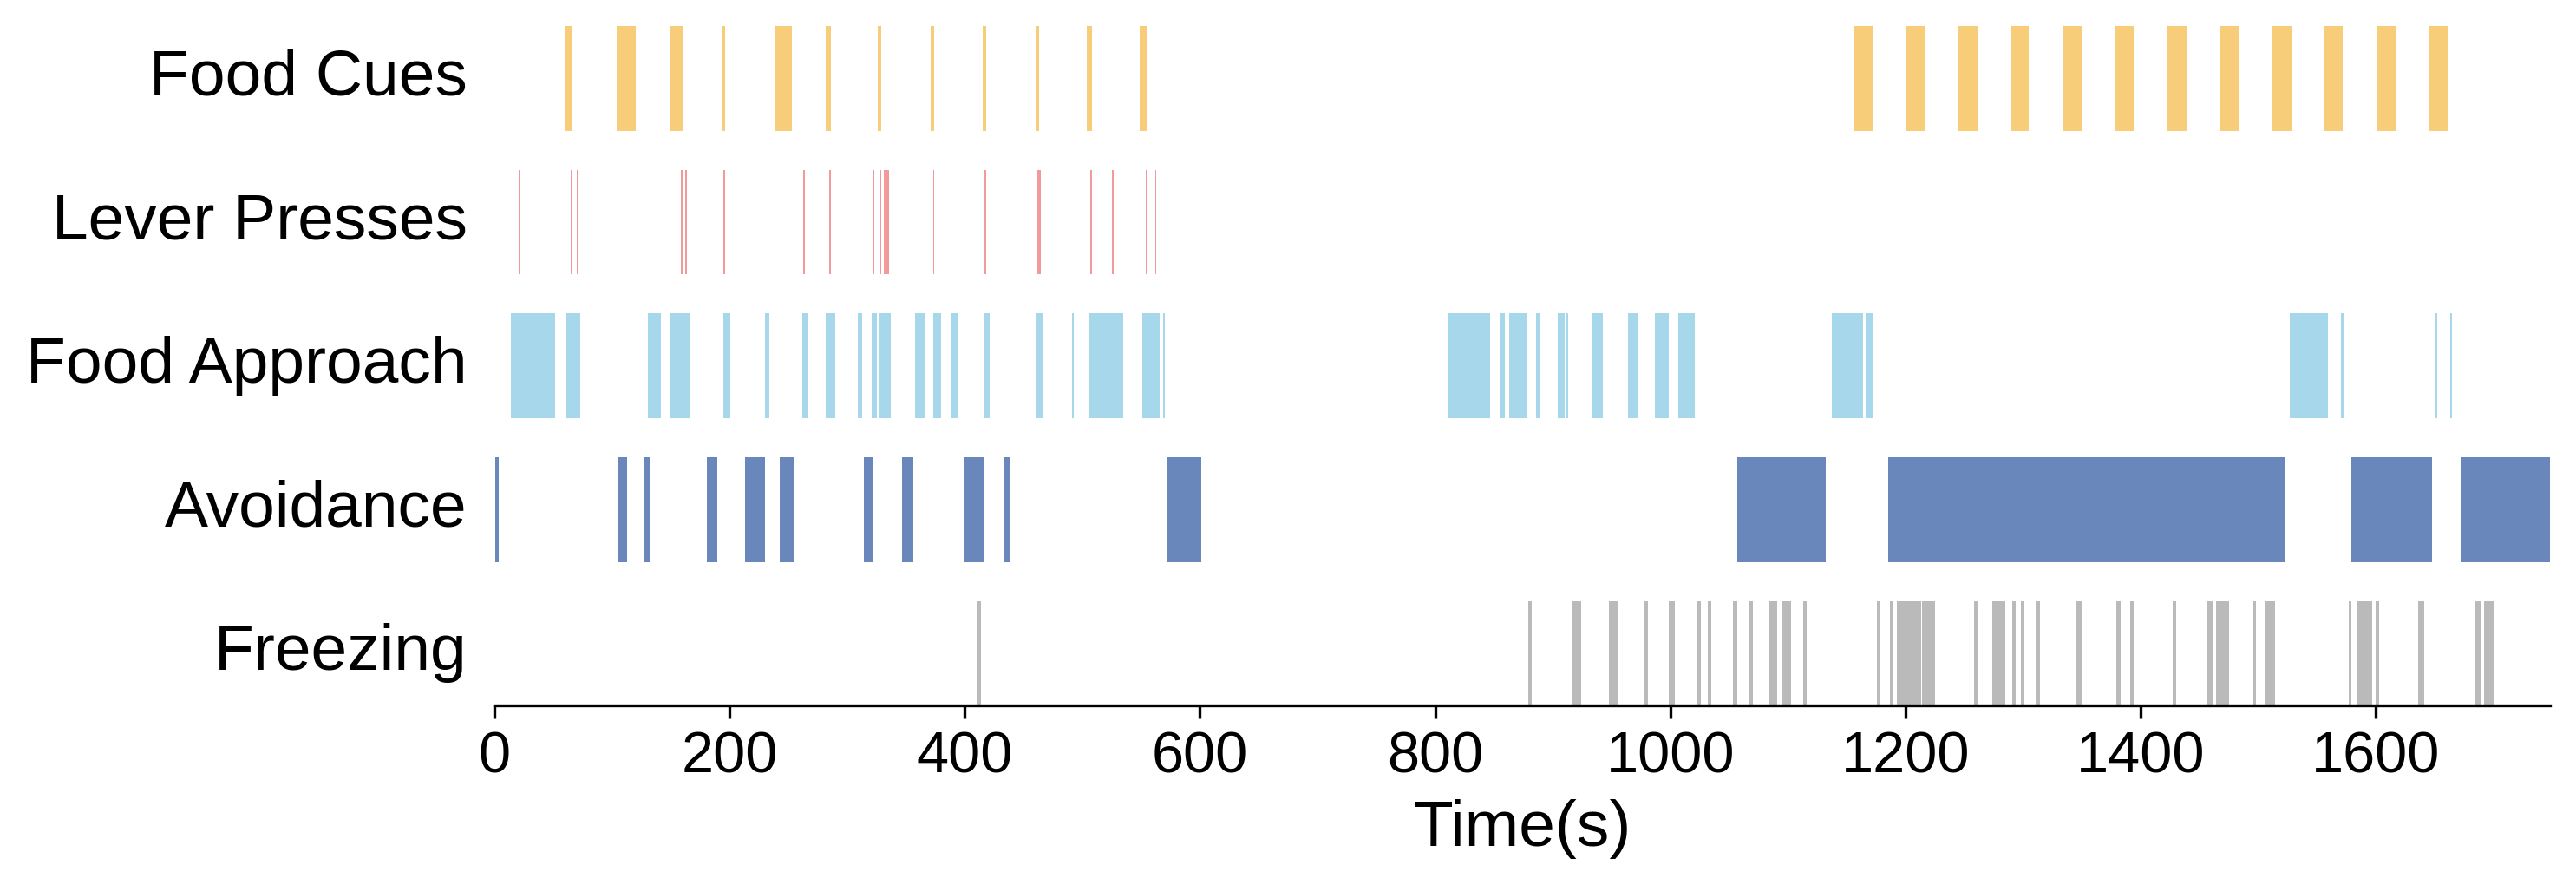

In [13]:
def plot_binary_spans(ax, timestamps, binary_values, color, ylabel, title = None, bottomspine = None, xlabel = None, xtick=None, alpha=0.8):
    """
    Plot horizontal spans for periods where binary_values are 1, without assuming timestamp format.

    Parameters:
    - timestamps: Sequence of any sequential identifiers.
    - binary_values: List, array, or pandas Series of binary values (0s and 1s).
    - color: Color of the spans. Default is 'blue'.
    - alpha: Transparency of the spans. Default is 0.5.
    """

    # Convert binary_values to a list if it's a pandas Series
    if isinstance(binary_values, pd.Series):
        binary_values_list = binary_values.tolist()
    else:
        binary_values_list = binary_values

    start_colored_span = None
    for i, value in enumerate(binary_values_list):
        if value > 0 and start_colored_span is None:
            # Mark the start of a span
            start_colored_span = i
        elif value == 0 and start_colored_span is not None:
            # End of a span, add it to the plot
            ax.axvspan(timestamps[start_colored_span], timestamps.iloc[i], facecolor=color, alpha=alpha, edgecolor = 'none')
            start_colored_span = None
    
    # Check if the last value in the series is '1' to close the last span
    if binary_values_list[-1] > 0:
        ax.axvspan(timestamps[start_colored_span], timestamps.iloc[-1], facecolor=color, alpha=alpha, edgecolor='none')

    ax.set_xlim(0, max(timestamps))
    ax.set_ylabel(ylabel, rotation = 0, verticalalignment = 'center', fontsize = 18, horizontalalignment = 'right')
    if title is not None:
        plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if bottomspine is None:
        ax.spines['bottom'].set_visible(False)
        
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize = 18)
        ax.tick_params(labelsize=16)
        
    if xtick is None:
        ax.set_xticks([])
    
    ax.set_yticks([])
    



fig, axs = plt.subplots(5, 1, figsize=(10, 3.5), dpi = 300)


plot_binary_spans(axs[0], Y.iloc[:,0], Y.iloc[:,-1], color = '#f6c157', ylabel = 'Food Cues')
plot_binary_spans(axs[1],Y.iloc[:,0], Y.iloc[:,-3], color = 'lightcoral', ylabel = 'Lever Presses')
plot_binary_spans(axs[2],Y.iloc[:,0], Y.iloc[:,-5], color = '#91cee6', ylabel = 'Food Approach')
plot_binary_spans(axs[3],Y.iloc[:,0], Y.iloc[:,-4], color = '#4569ab', ylabel = 'Avoidance')
plot_binary_spans(axs[4],Y.iloc[:,0], Y.iloc[:,3], color = 'darkgrey', ylabel = 'Freezing', title = None, bottomspine = True, xlabel = 'Time(s)', xtick=True)

plt.tight_layout()
plt.savefig("/scratch/09117/xz6783/Xu/Plots/Fig1/fig1_ethograms_threat.svg", transparent=True)
plt.show()